<a href="https://colab.research.google.com/github/sacredsliver/neural_networks/blob/main/DZ2/DZ2_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.preprocessing import image

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape


(60000, 28, 28)

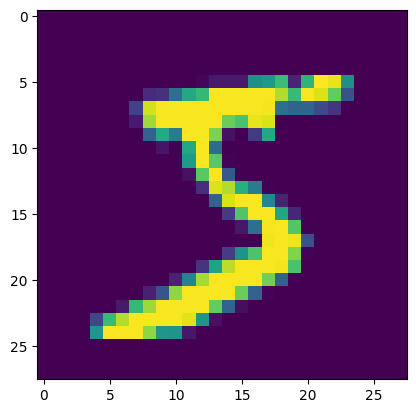

In [4]:
plt.imshow(x_train[0])

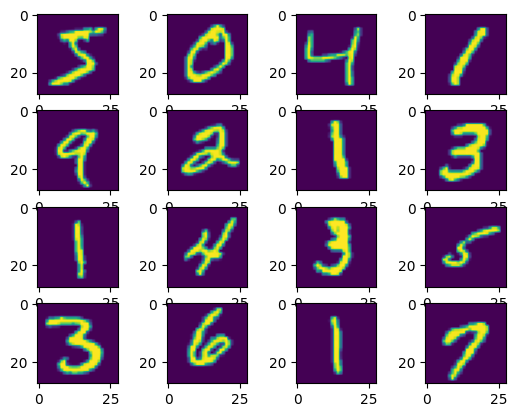

In [5]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
plt.show()

In [6]:
input_shape = (28, 28, 1)



In [7]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50),
      Dense(1)
      ] )

In [8]:
model_1.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
x_train = x_train / 255
x_test = x_test / 255



In [11]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [12]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50, activation="relu"),
      Dense(10, activation="softmax")
      ] )
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model_2.fit(x_train, y_train,
                    batch_size=200,
                    epochs=5, validation_data =(x_test, y_test))

Epoch 1/5
300/300 [==============================] - 2s 5ms/step - loss: 0.5075 - accuracy: 0.8621 - val_loss: 0.2639 - val_accuracy: 0.9266
Epoch 2/5
300/300 [==============================] - 1s 4ms/step - loss: 0.2417 - accuracy: 0.9327 - val_loss: 0.2053 - val_accuracy: 0.9419
Epoch 3/5
300/300 [==============================] - 2s 5ms/step - loss: 0.1948 - accuracy: 0.9449 - val_loss: 0.1776 - val_accuracy: 0.9494
Epoch 4/5
300/300 [==============================] - 2s 6ms/step - loss: 0.1661 - accuracy: 0.9533 - val_loss: 0.1589 - val_accuracy: 0.9561
Epoch 5/5
300/300 [==============================] - 1s 4ms/step - loss: 0.1447 - accuracy: 0.9597 - val_loss: 0.1404 - val_accuracy: 0.9600


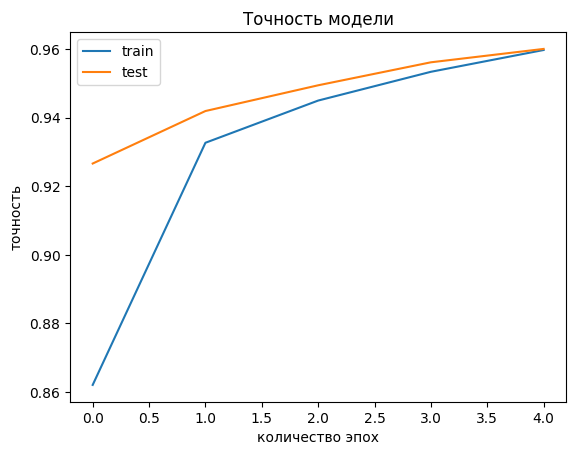

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

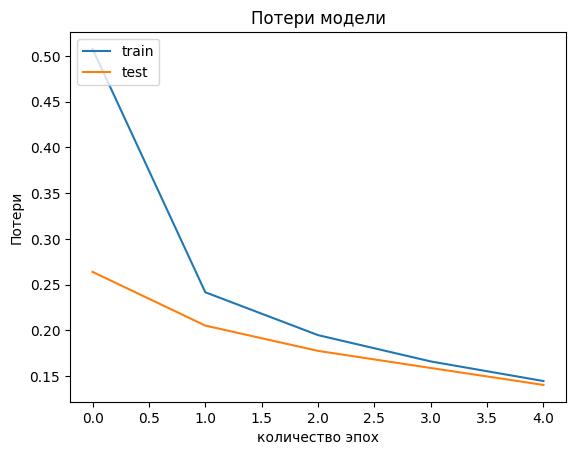

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
scores = model_2.evaluate(x_test, y_test)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

313/313 [==============================] - 1s 2ms/step - loss: 0.1404 - accuracy: 0.9600
Доля верных ответов на тестовых данных, в процентах: 96.0


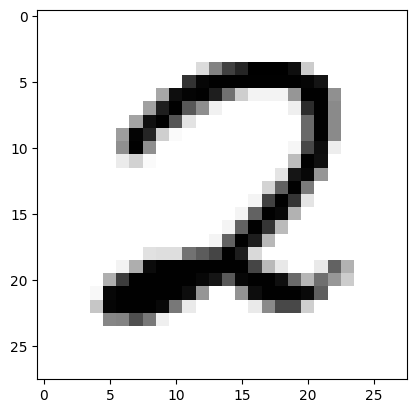

1/1 [==============================] - 0s 22ms/step
Цифра: 2


In [19]:
n_rec=35
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

prediction = model_2.predict(x)
prediction = np.argmax(prediction[0])
print("Цифра:", prediction)

In [20]:
img = image.load_img('/content/3.jpg')
img = img.resize((28,28))
img = img.convert('L')
img = np.array(img)
img = img.reshape(1,28,28)
img = img/255.0
prediction = model_2.predict(img)
prediction = np.argmax(prediction)
print("цифра:", prediction)

1/1 [==============================] - 0s 21ms/step
цифра: 3
